# Part II - Loan Data Analysis
### by HRD

## Investigation Overview

The overall goal of this presentation is to visualize and explain what drives the setting of interest rates for loans in the period of 2006 to 2014, centered around credit grade available data of 2006-2009. Who are getting the best interest rates and which features best describe them? 


## Dataset Overview and Executive Summary

The data set contains of 113,937 loans with 81 variables on each loan. The main features of interest include loan amount, borrower rate (interest rate) borrower income, and credit grades. Those are the features of focus in this report.  

**Findings summary**: 
* The worse the credit grade, the lower the chance for a good interest rate and high loan amount. A grade worse than "B" will give the borrower a very low chance for the best rate.
* Being a homeowner increases your chance for a higher loan, and also gives the borrower a better chance for a good interest rate.
* Being employed is a good thing, both for the borrowers rate and for getting a higher loan amount.
* The borrowers income will affect the chance for a low rate and a high loan amount.

In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [167]:
# Importing our cleaned dataframe
df = pd.read_csv('df_cleaned')

# Ordinal transformations 
cranges = ['AA','A','B','C','D', 'E', 'HR', 'NC']
cclasses = pd.CategoricalDtype(ordered=True, categories=cranges)
df['CreditGrade'] = df['CreditGrade'].astype(cclasses)
iranges = ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
iclasses = pd.CategoricalDtype(ordered=True, categories=iranges)
df['IncomeRange'] = df['IncomeRange'].astype(iclasses)

## Visualization 1
The first visualization displays probability density functions for interest rates against 4 other features; is borrower homeowner, credit grade, employment status and income range. The purpose of the first visualization is to give an overall impression of what affects who is getting different interest rates on loans. 

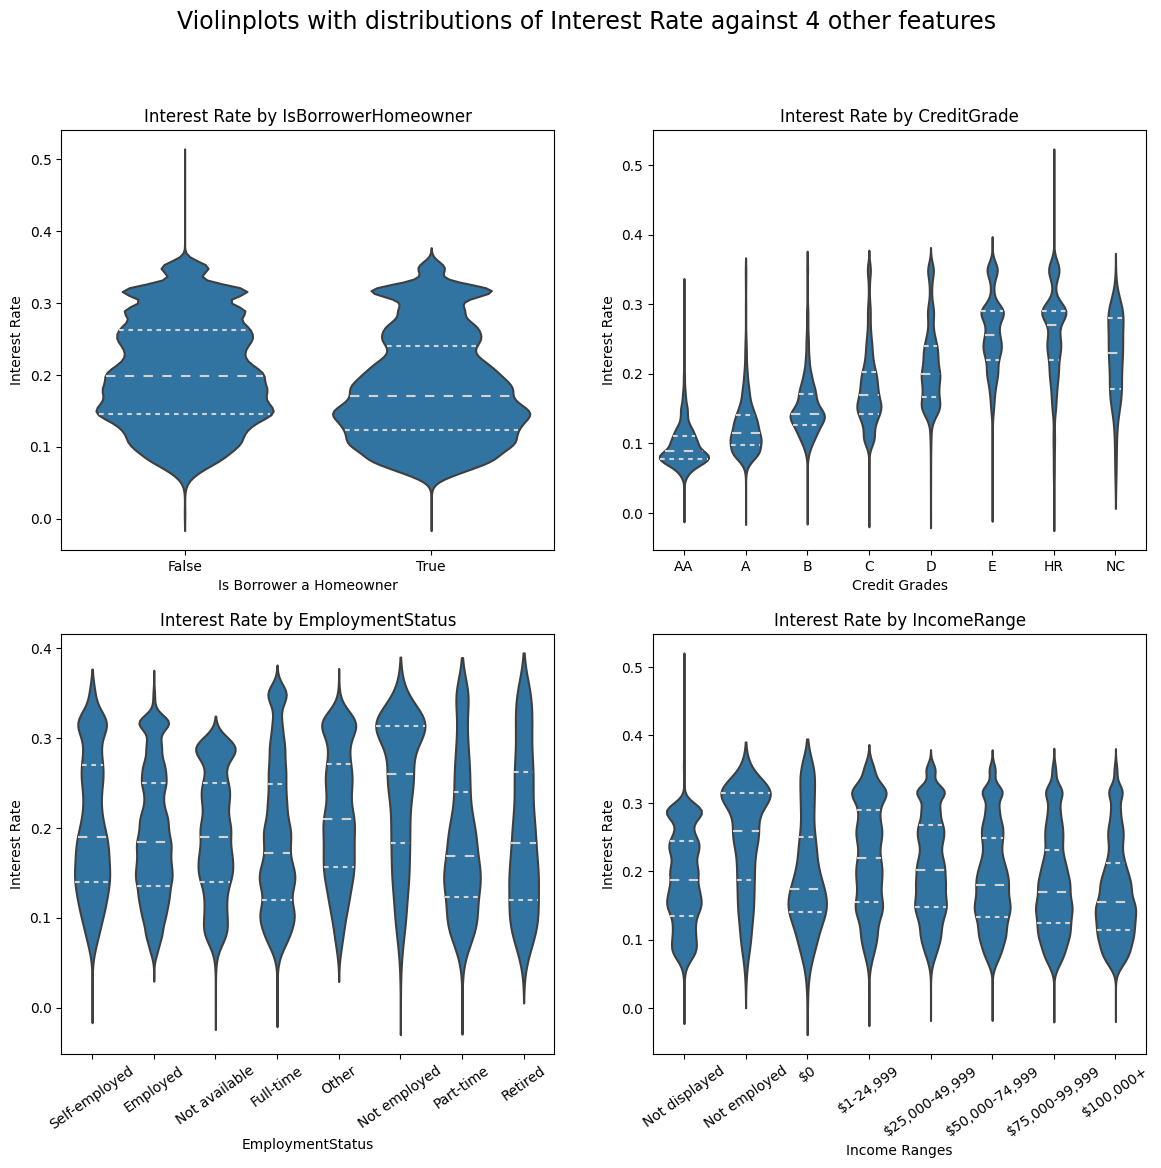

In [172]:
def Violin_plots(var1):
    '''Function which takes as input a quantiative variable (preferably LoanOriginalAmount or BorrowerRate) 
    and provides as output 4 violin-type plots for IsBorrowerHomeOwner, CreditGrade, EmploymentStatus and IncomeRange'''
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(14,12))
    fig.suptitle(f'Violinplots with distributions of {var1} against 4 other features', fontsize=17, y=0.98)
    df.rename(columns={'BorrowerRate': 'Interest Rate'}, inplace=True)
    
    # Ax1: Plot 1
    ax1.set_title(f'{var1} by IsBorrowerHomeowner')
    ax1 = sns.violinplot(data=df, y=var1, x='IsBorrowerHomeowner', color='tab:blue', inner='quartile', ax=ax1)
    ax1.set_xlabel('Is Borrower a Homeowner')
    [l.set_color('lightgrey') for l in ax1.lines]
    
    # Ax2: Plot 2
    ax2 = sns.violinplot(data=df, y=var1, x='CreditGrade', color='tab:blue', inner='quartile', ax=ax2)
    ax2.set_title(f'{var1} by CreditGrade')
    ax2.set_xlabel('Credit Grades')
    [l.set_color('lightgrey') for l in ax2.lines]

    # Ax3: Plot 3
    ax3 = sns.violinplot(data=df, y=var1, x='EmploymentStatus', color='tab:blue', inner='quartile', ax=ax3)
    ax3.set_title(f'{var1} by EmploymentStatus')
    ax4.set_xlabel('EmploymentStatus')
    ax3.tick_params(axis='x', rotation=35)
    [l.set_color('lightgrey') for l in ax3.lines]

    # Ax4: Plot 4
    ax4 = sns.violinplot(data=df, y=var1, x='IncomeRange', color='tab:blue', inner='quartile', ax=ax4)
    ax4.set_title(f'{var1} by IncomeRange')
    ax4.set_xlabel('Income Ranges')
    ax4.tick_params(axis='x', rotation=35)
    [l.set_color('lightgrey') for l in ax4.lines]
    
Violin_plots('Interest Rate')

**Key insights 1**: 
All 4 visualizations plotted above are against the feature "interest rate" on the y-axis. Below are the key takeaways from the plots. 
* Top left plot, Is Borrower a Homeowner: True has lower percentiles than False, and is thinner in the upper-end of the rates. Gives us the impression being a homeowner increases chance of a better interest rate.  
* Top right plot, Credit Grade: "AA" creditgrade has an exceptionally good distribution for interest rates around 0.1-0.15. Creditgrade "A" is also very good, with a decreasing trend towards "HR". "NC" is better and comparable to CreditGrade "D" and "E". 
* Bottom left plot, EmploymentStatus: "Part-time" suprises us with a fat distribution at the low end of the interest rate spectrum. Being "not employed" doesn't look good rate-wise, while on the other hand "self employed", "employed" and "full-time" have more promising distributions, but not always for the best. 
* Bottom right plot, income range: a high income gives the best low-end interest rate distribution. The worse the income, the higher the median. However, "0k" and "not displayed" have the same median, comparable to a high-earning individual. 

## Visualization 2
The second visualization displays a scatterplot with interest rates on the x-axis and loan amounts on the y-axis. Datapoints are colored based on their associated credit grade. The purpose of the visualization is to give a clear picture of the relationship between the three mentioned variables, and how all three are connected.

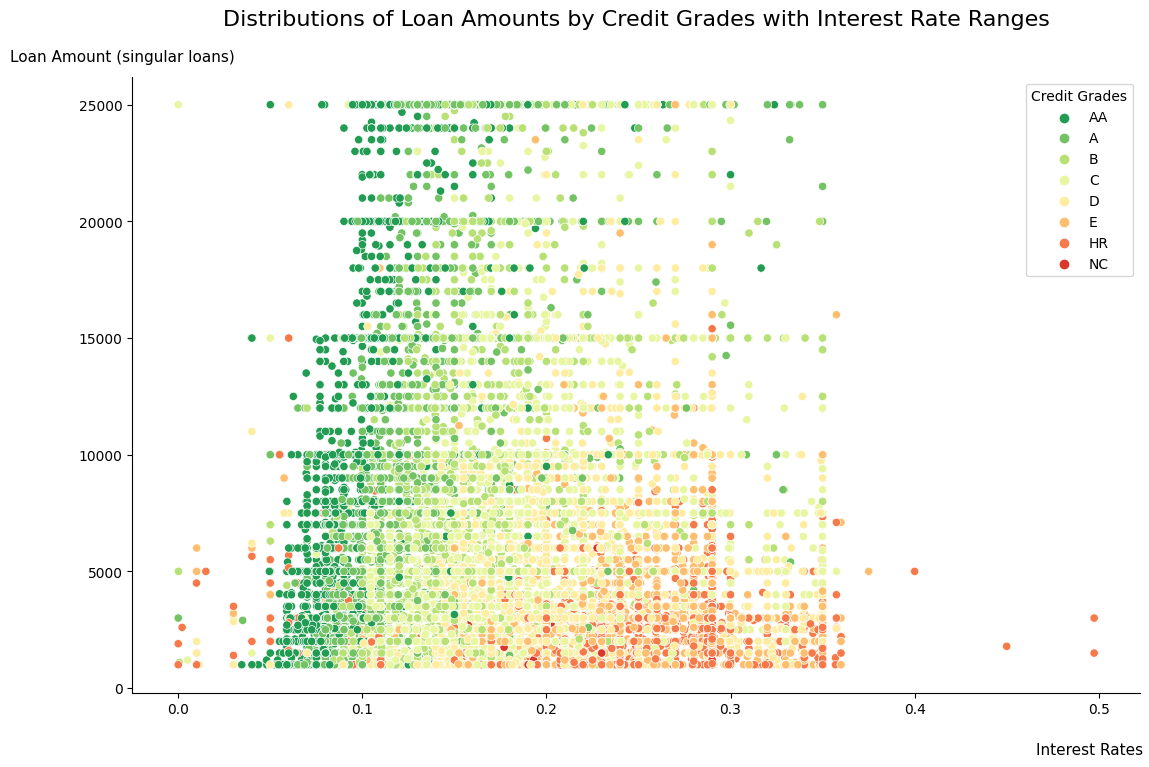

In [146]:
def LoanScatterplot(df): 
    '''Function which takes as input a loan dataframe and outputs a multivariate scatterplot'''
    
    creditdf= df[['BorrowerRate', 'LoanOriginalAmount', 'CreditGrade']].dropna()
    creditdf = creditdf.sample(n=20000, random_state=1)
    plt.figure(figsize=(13,8))
    ax = sns.scatterplot(data=creditdf, x='BorrowerRate', y='LoanOriginalAmount', hue='CreditGrade', palette='RdYlGn_r')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_title('Distributions of Loan Amounts by Credit Grades with Interest Rate Ranges', y=1.07, size=16);
    legend = ax.legend(loc='upper right')
    legend.set_title('Credit Grades')
    ax.set_xlabel('Interest Rates', size=11)
    ax.xaxis.set_label_coords(.95, -0.08)
    ax.set_ylabel('Loan Amount (singular loans)', size=11, rotation=0, labelpad=20)
    ax.yaxis.set_label_coords(-0.01, 1.02)
    
    
LoanScatterplot(df)

**Key insights 2**:
* From the plot we draw the insight that for the most part, a good grade will yield you a good interest rate. This insight is further nuanced by loan amounts on the y-axis. If you have an exceptional rate of "AA", you will get a better rate for a low loan amount than for a high loan amount (seen with close distributions at the low loan spectrum of with loan amount < 5k, compared to a slightly shifted rate at the high end of the spectrum, loan amount > 20k). 
* The bad CreditGrades ("D", "E", "HR" and "NC") we see are for the most part shifted to the right on the interest rate spectrum, most loans with a rate beyond 0.2. On the y-axis, these groups are also more often than not on the lower end of the scale, with loans below 10k or 5k. However, there are also exceptions seen in the plot, with red dots on the left side of the plot among the green, and quite a few "D" rated beyond 15k aswell on the y-axis. 

## Visualization 3
The third and last visualization displays a barplot with credit grades on the x-axis, total loan amount on the y-axis and interest rate ranges as labels for each bar in the barplot. The purpose of the visualization is to describe the total loan amounts for combinations of interest rate ranges and credit grades. The plot will also give an even clearer idea of which borrowers are getting what interest rates.  

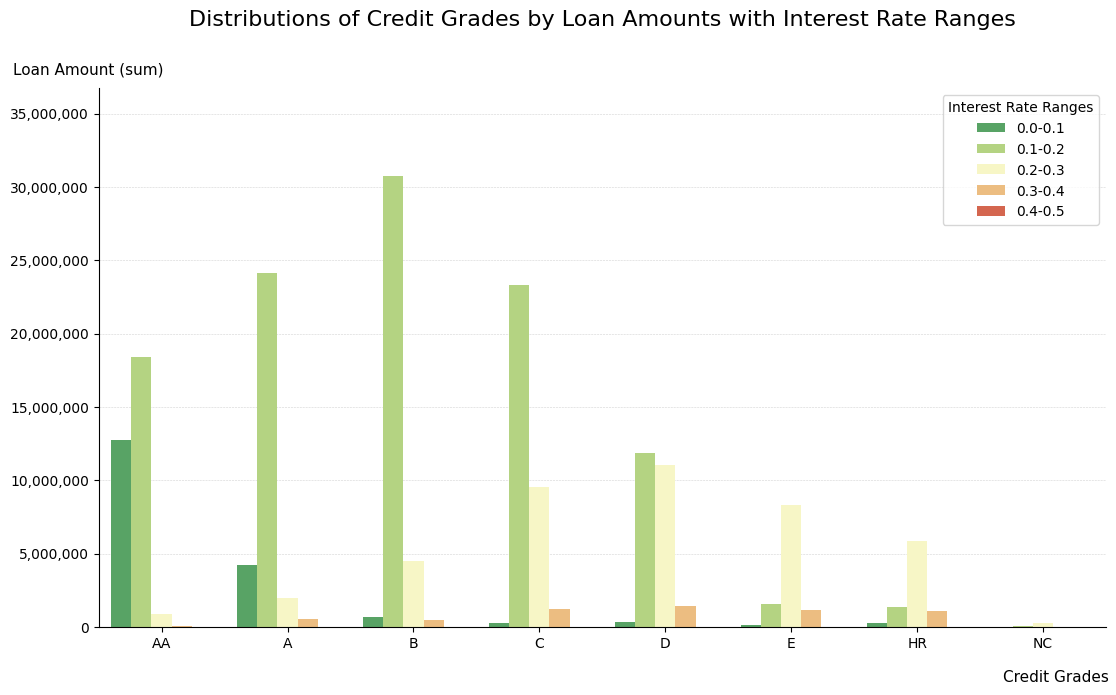

In [173]:
def LoanBarplot(df): 
    '''Function which takes as input a loan dataframe and outputs a multivariate barplot'''
    
    plt.figure(figsize=(13,7))
    sum_values = df.groupby(['CreditGrade', 'BorrowerRateRange'])['LoanOriginalAmount'].sum()
    sum_values = sum_values.reset_index()
    ax = sns.barplot(data=sum_values, x='CreditGrade', y='LoanOriginalAmount', hue='BorrowerRateRange', palette='RdYlGn_r')
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_title('Distributions of Credit Grades by Loan Amounts with Interest Rate Ranges', y=1.10, size=16);
    legend = ax.legend(loc='upper right')
    legend.set_title('Interest Rate Ranges')
    
    ax.set_xlabel('Credit Grades', size=11)
    ax.xaxis.set_label_coords(.95, -0.08)
    ax.set_ylabel('Loan Amount (sum)', size=11, rotation=0, labelpad=20)
    ax.yaxis.set_label_coords(-0.01, 1.02)    
    
    for y_tick in plt.yticks()[0]:
        plt.axhline(y=y_tick, color='lightgray', linestyle='--', zorder=0, linewidth=0.4)
        
LoanBarplot(df)

**Key Insights 3**: 
* CreditGrade "AA" almost without exception have rate-ranges of 0.0-0.1 and 0.1-0.2. Borrowers with rate "A" also looks to have quite decent terms. 
* Further on the x-axis we see a decreasing trend of loan amounts with good rates, and this becomes particularly apparent for credit grades "D", "E" and "HR (high risk)" credit grades. For these credit grades, rate ranges of 0.2-0.3 becomes the most important range for the loan sum, and ranges of 0.3-0.4 are not that rare anymore. 

In [2]:
import nbconvert

In [4]:
jupyter nbconvert --no-input yourNotebook.ipynb

SyntaxError: invalid syntax (684666831.py, line 1)